<a href="https://colab.research.google.com/github/alinepsantos/TCC-PUC/blob/main/TCC_Teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn -q

In [2]:
import pandas as pd
import requests as r
import csv
import statistics as sts
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from statistics import mean
from pandas.core.groupby.generic import generate_property
generate_property
from scipy import stats
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from google.colab import drive

In [4]:
atlas_df=pd.read_csv('https://raw.githubusercontent.com/alinepsantos/TCC-PUC/main/Atlas.csv')
censo_df=pd.read_csv('https://raw.githubusercontent.com/alinepsantos/TCC-PUC/main/municipio.csv')

In [5]:
drive.mount('/content/drive')
ibge_df=pd.read_excel('/content/drive/MyDrive/TCC-PUC/RELATORIO_DTB_BRASIL_MUNICIPIO.xls')

Mounted at /content/drive


In [6]:
censo_df=censo_df[['ano','sigla_uf','id_municipio','area_total','area_lavoura_permanente','area_lavoura_temporaria','area_pastagem','area_sistema_agroflorestal','area_mata','area_nao_utilizada','valor_producao_total_animal','valor_total_producao_lavoura_temporaria','valor_total_producao_lavoura_permanente','valor_total_producao_cafe','valor_total_arroz','valor_total_feijao','valor_total_milho','valor_total_mandioca','valor_total_soja','valor_total_algodao','valor_total_cana','valor_total_trigo','valor_producao_total','despesa_salarios']]
censo_df.head()

,ano,sigla_uf,id_municipio,area_total,area_lavoura_permanente,area_lavoura_temporaria,area_pastagem,area_sistema_agroflorestal,area_mata,area_nao_utilizada,...,valor_total_arroz,valor_total_feijao,valor_total_milho,valor_total_mandioca,valor_total_soja,valor_total_algodao,valor_total_cana,valor_total_trigo,valor_producao_total,despesa_salarios
0,1985,RO,1100023,NaN,NaN,NaN,NaN,696660.25,NaN,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1985,RO,1100049,NaN,NaN,NaN,NaN,NaN,NaN,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1985,RO,1100056,NaN,NaN,NaN,NaN,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1985,RO,1100064,NaN,NaN,NaN,NaN,NaN,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1985,RO,1100080,NaN,NaN,NaN,NaN,NaN,NaN,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
atlas_df=atlas_df[['ano','id_municipio','idhm','idhm_e','idhm_l','idhm_r']]
atlas_df.head()

,ano,id_municipio,idhm,idhm_e,idhm_l,idhm_r
0,1991,1100015,0.329,0.112,0.617,0.516
1,1991,1100023,0.432,0.199,0.684,0.593
2,1991,1100031,0.309,0.108,0.636,0.430
3,1991,1100049,0.407,0.171,0.667,0.593
4,1991,1100056,0.386,0.167,0.629,0.547


In [8]:
ibge_df=ibge_df[['Código Município Completo','Nome_Município']]
ibge_df.head()

,Código Município Completo,Nome_Município
0,1100015,Alta Floresta D'Oeste
1,1100379,Alto Alegre dos Parecis
2,1100403,Alto Paraíso
3,1100346,Alvorada D'Oeste
4,1100023,Ariquemes


In [9]:
ibge_rename=ibge_df.rename(columns={'Código Município Completo':'id_municipio'})

In [10]:
rows_atlas=atlas_df.shape[0]
rows_censo=censo_df.shape[0]
rows_ibge=ibge_df.shape[0]
print('Quantidade de linhas atlas_df:',rows_atlas)
print('Quantidade de linhas censo_df:',rows_censo)
print('Quantidade de linhas ibge_df:',rows_ibge)

Quantidade de linhas atlas_df: 16695
Quantidade de linhas censo_df: 20738
Quantidade de linhas ibge_df: 5570


In [11]:
print(type(atlas_df))
print(type(censo_df))
print(type(ibge_df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [12]:
censo_df_1985=censo_df.loc[censo_df['ano']==1985]
censo_df_1995=censo_df.loc[censo_df['ano']==1996]
censo_df_2006=censo_df.loc[censo_df['ano']==2006]
censo_df_2017=censo_df.loc[censo_df['ano']==2017]
atlas_df_1991=atlas_df.loc[atlas_df['ano']==1991]
atlas_df_2000=atlas_df.loc[atlas_df['ano']==2000]
atlas_df_2010=atlas_df.loc[atlas_df['ano']==2010]
censo1985_atlas1991=censo_df_1985.merge(atlas_df_1991,on='id_municipio')
censo1995_atlas1991=censo_df_1995.merge(atlas_df_1991,on='id_municipio')
censo2006_atlas2000=censo_df_2006.merge(atlas_df_2000,on='id_municipio')
censo2017_atlas2010=censo_df_2017.merge(atlas_df_2010,on='id_municipio')

In [13]:
censo1995_atlas1991.head()

,ano_x,sigla_uf,id_municipio,area_total,area_lavoura_permanente,area_lavoura_temporaria,area_pastagem,area_sistema_agroflorestal,area_mata,area_nao_utilizada,...,valor_total_algodao,valor_total_cana,valor_total_trigo,valor_producao_total,despesa_salarios,ano_y,idhm,idhm_e,idhm_l,idhm_r
0,1996,RO,1100015,422541.34,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,19.0,2994.0,1991,0.329,0.112,0.617,0.516
1,1996,RO,1100023,NaN,NaN,NaN,NaN,NaN,NaN,12,...,NaN,NaN,NaN,15.0,1927.0,1991,0.432,0.199,0.684,0.593
2,1996,RO,1100031,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,455.0,1150.0,1991,0.309,0.108,0.636,0.430
3,1996,RO,1100049,NaN,NaN,NaN,NaN,NaN,NaN,12,...,NaN,NaN,NaN,592.0,3567.0,1991,0.407,0.171,0.667,0.593
4,1996,RO,1100056,413953.51,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,363.0,1168.0,1991,0.386,0.167,0.629,0.547


In [14]:
dados_concat=pd.concat([censo1985_atlas1991,censo1995_atlas1991,censo2006_atlas2000,censo2017_atlas2010], axis=0, ignore_index=True)
dados_concat.head()

,ano_x,sigla_uf,id_municipio,area_total,area_lavoura_permanente,area_lavoura_temporaria,area_pastagem,area_sistema_agroflorestal,area_mata,area_nao_utilizada,...,valor_total_algodao,valor_total_cana,valor_total_trigo,valor_producao_total,despesa_salarios,ano_y,idhm,idhm_e,idhm_l,idhm_r
0,1985,RO,1100023,NaN,NaN,NaN,NaN,696660.25,NaN,64,...,NaN,NaN,NaN,NaN,NaN,1991,0.432,0.199,0.684,0.593
1,1985,RO,1100049,NaN,NaN,NaN,NaN,NaN,NaN,23,...,NaN,NaN,NaN,NaN,NaN,1991,0.407,0.171,0.667,0.593
2,1985,RO,1100056,NaN,NaN,NaN,NaN,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,1991,0.386,0.167,0.629,0.547
3,1985,RO,1100064,NaN,NaN,NaN,NaN,NaN,NaN,7,...,NaN,NaN,NaN,NaN,NaN,1991,0.376,0.151,0.658,0.536
4,1985,RO,1100080,NaN,NaN,NaN,NaN,NaN,NaN,23,...,NaN,NaN,NaN,NaN,NaN,1991,0.425,0.220,0.629,0.553


In [15]:
dados_merge_ibge=dados_concat.merge(ibge_rename,on='id_municipio')
dados_merge_ibge.tail()

,ano_x,sigla_uf,id_municipio,area_total,area_lavoura_permanente,area_lavoura_temporaria,area_pastagem,area_sistema_agroflorestal,area_mata,area_nao_utilizada,...,valor_total_cana,valor_total_trigo,valor_producao_total,despesa_salarios,ano_y,idhm,idhm_e,idhm_l,idhm_r,Nome_Município
20728,2006,GO,5210158,18541.4,102.69,4829.01,11730.40,1556.77,286.82,27,...,157632.9,NaN,NaN,1255.51,2000,0.559,0.392,0.761,0.586,Ipiranga de Goiás
20729,2017,GO,5210158,16749.0,153.00,5706.00,8837.00,98.00,1586.00,306,...,NaN,NaN,0.0,428.00,2010,0.696,0.642,0.816,0.643,Ipiranga de Goiás
20730,2006,GO,5212253,53791.7,30.37,2548.13,43441.91,7378.77,105.11,13,...,289729.4,NaN,NaN,NaN,2000,0.559,0.366,0.815,0.585,Lagoa Santa
20731,2017,GO,5212253,43446.0,68.00,66.00,33933.00,0.00,8439.00,427,...,NaN,NaN,0.0,113.00,2010,0.740,0.638,0.868,0.733,Lagoa Santa
20732,2017,PI,2206720,10547.0,1190.00,1216.00,3374.00,1104.00,2003.00,1586,...,NaN,NaN,104.0,870.00,2010,0.602,0.512,0.780,0.546,Nazária


In [16]:
dados_rename=dados_merge_ibge.rename(columns={'ano_x':'ano_censo_agropecuario','id_municipio':'codigo_ibge','sigla_uf':'uf','Nome_Município':'municipio','ano_y':'ano_atlas'})

In [17]:
dados_rename.head()

,ano_censo_agropecuario,uf,codigo_ibge,area_total,area_lavoura_permanente,area_lavoura_temporaria,area_pastagem,area_sistema_agroflorestal,area_mata,area_nao_utilizada,...,valor_total_cana,valor_total_trigo,valor_producao_total,despesa_salarios,ano_atlas,idhm,idhm_e,idhm_l,idhm_r,municipio
0,1985,RO,1100023,NaN,NaN,NaN,NaN,696660.25,NaN,64,...,NaN,NaN,NaN,NaN,1991,0.432,0.199,0.684,0.593,Ariquemes
1,1996,RO,1100023,NaN,NaN,NaN,NaN,NaN,NaN,12,...,NaN,NaN,15.0,1927.0,1991,0.432,0.199,0.684,0.593,Ariquemes
2,2006,RO,1100023,359879.88,NaN,NaN,NaN,134616.75,NaN,111,...,NaN,NaN,NaN,NaN,2000,0.556,0.343,0.742,0.674,Ariquemes
3,2017,RO,1100023,334256.00,5235.0,5341.0,221786.0,1573.00,89480.0,10692,...,NaN,NaN,594.0,2928.0,2010,0.702,0.600,0.806,0.716,Ariquemes
4,1985,RO,1100049,NaN,NaN,NaN,NaN,NaN,NaN,23,...,NaN,NaN,NaN,NaN,1991,0.407,0.171,0.667,0.593,Cacoal


In [18]:
dados_rename.isnull().sum()

ano_censo_agropecuario                         0
uf                                             0
codigo_ibge                                    0
area_total                                  5480
area_lavoura_permanente                     9884
area_lavoura_temporaria                    10653
area_pastagem                              10223
area_sistema_agroflorestal                 10353
area_mata                                  10764
area_nao_utilizada                             0
valor_producao_total_animal                 8603
valor_total_producao_lavoura_temporaria     7007
valor_total_producao_lavoura_permanente     1890
valor_total_producao_cafe                      0
valor_total_arroz                          19159
valor_total_feijao                         15451
valor_total_milho                          15294
valor_total_mandioca                       18114
valor_total_soja                           15637
valor_total_algodao                        18414
valor_total_cana    

In [19]:
lista_municipio =  list(dados_rename['municipio'].drop_duplicates())
lista_colunas = ['area_total',
'valor_producao_total',
'despesa_salarios']

def get_medias_by_municipio(municipio, coluna):
  return dados_rename.loc[(dados_rename['municipio'] == municipio), [coluna]].mean()

for coluna in lista_colunas:
  for municipio in lista_municipio:
    media = get_medias_by_municipio(municipio, coluna)
    dados_rename.loc[(dados_rename['municipio'] == municipio), [coluna]] = dados_rename.loc[(dados_rename['municipio'] == municipio), [coluna]].fillna(media)

In [20]:
dados_rename['despesa_salarios'].mean()

1581.9991913889291

In [21]:
dados_rename=dados_rename.fillna(0)

In [22]:
dados_rename.isnull().sum()

ano_censo_agropecuario                     0
uf                                         0
codigo_ibge                                0
area_total                                 0
area_lavoura_permanente                    0
area_lavoura_temporaria                    0
area_pastagem                              0
area_sistema_agroflorestal                 0
area_mata                                  0
area_nao_utilizada                         0
valor_producao_total_animal                0
valor_total_producao_lavoura_temporaria    0
valor_total_producao_lavoura_permanente    0
valor_total_producao_cafe                  0
valor_total_arroz                          0
valor_total_feijao                         0
valor_total_milho                          0
valor_total_mandioca                       0
valor_total_soja                           0
valor_total_algodao                        0
valor_total_cana                           0
valor_total_trigo                          0
valor_prod

In [23]:
dados=dados_rename
dados.head()

,ano_censo_agropecuario,uf,codigo_ibge,area_total,area_lavoura_permanente,area_lavoura_temporaria,area_pastagem,area_sistema_agroflorestal,area_mata,area_nao_utilizada,...,valor_total_cana,valor_total_trigo,valor_producao_total,despesa_salarios,ano_atlas,idhm,idhm_e,idhm_l,idhm_r,municipio
0,1985,RO,1100023,347067.94,0.0,0.0,0.0,696660.25,0.0,64,...,0.0,0.0,304.5,2427.5,1991,0.432,0.199,0.684,0.593,Ariquemes
1,1996,RO,1100023,347067.94,0.0,0.0,0.0,0.00,0.0,12,...,0.0,0.0,15.0,1927.0,1991,0.432,0.199,0.684,0.593,Ariquemes
2,2006,RO,1100023,359879.88,0.0,0.0,0.0,134616.75,0.0,111,...,0.0,0.0,304.5,2427.5,2000,0.556,0.343,0.742,0.674,Ariquemes
3,2017,RO,1100023,334256.00,5235.0,5341.0,221786.0,1573.00,89480.0,10692,...,0.0,0.0,594.0,2928.0,2010,0.702,0.600,0.806,0.716,Ariquemes
4,1985,RO,1100049,229728.14,0.0,0.0,0.0,0.00,0.0,23,...,0.0,0.0,300.0,3690.5,1991,0.407,0.171,0.667,0.593,Cacoal


In [25]:
dados.describe()

,ano_censo_agropecuario,codigo_ibge,area_total,area_lavoura_permanente,area_lavoura_temporaria,area_pastagem,area_sistema_agroflorestal,area_mata,area_nao_utilizada,valor_producao_total_animal,...,valor_total_algodao,valor_total_cana,valor_total_trigo,valor_producao_total,despesa_salarios,ano_atlas,idhm,idhm_e,idhm_l,idhm_r
count,20733.000000,2.073300e+04,2.073300e+04,20733.000000,20733.000000,2.073300e+04,2.073300e+04,2.073300e+04,20733.000000,20733.000000,...,2.073300e+04,2.073300e+04,2.073300e+04,2.073300e+04,2.073300e+04,20733.000000,20733.000000,20733.000000,20733.000000,20733.000000
mean,2002.135292,3.248314e+06,6.403347e+04,586.610486,5918.945098,2.003208e+04,6.493386e+03,6.100770e+03,692.525732,1448.142605,...,6.215609e+04,4.471944e+04,6.388048e+04,2.559282e+04,1.581999e+03,1998.508706,0.497632,0.331287,0.708951,0.567561
std,11.462081,9.695604e+05,1.442514e+05,2226.951370,20496.855115,8.204588e+04,4.627128e+04,2.909199e+04,3164.715536,9531.803137,...,3.175920e+05,2.347568e+05,3.899209e+05,1.554629e+05,1.935170e+04,7.882572,0.147131,0.185149,0.093191,0.104918
min,1985.000000,1.100015e+06,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1991.000000,0.120000,0.010000,0.433000,0.229000
25%,1996.000000,2.513968e+06,1.231700e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,7.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.580000e+02,1991.000000,0.384000,0.175000,0.648000,0.488000
50%,2006.000000,3.145059e+06,2.594593e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,66.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,9.800000e+01,5.380000e+02,2000.000000,0.497000,0.295000,0.718000,0.573000
75%,2017.000000,4.115200e+06,5.911708e+04,272.278000,3161.000000,9.978000e+03,7.060000e+02,1.991390e+03,371.000000,7.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,2.857000e+03,1.086000e+03,2010.000000,0.614000,0.487000,0.779000,0.649000
max,2017.000000,5.300108e+06,5.267311e+06,57954.340000,579144.000000,3.695165e+06,2.195765e+06,1.125574e+06,274144.000000,375923.000000,...,8.498327e+06,6.374505e+06,9.606732e+06,1.032691e+07,1.690892e+06,2010.000000,0.862000,0.811000,0.894000,0.891000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: ignored

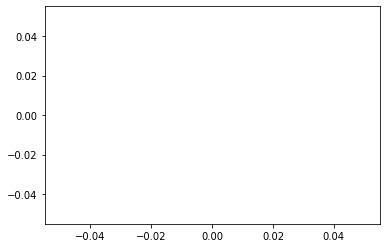

In [26]:
area_total_por_ano = dados.sum()
sns.lineplot(area_total_por_ano)

In [28]:
areas_por_ano = dados.groupby('ano_censo_agropecuario')[['area_lavoura_permanente','area_lavoura_temporaria','area_pastagem','area_sistema_agroflorestal','area_mata','area_nao_utilizada']].sum()
ax = sns.lineplot(areas_por_ano)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: ignored

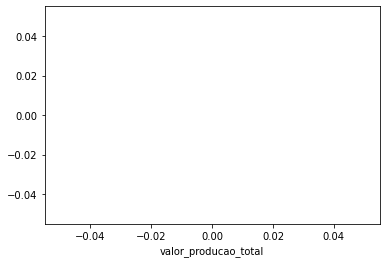

In [29]:
valor_por_ano = dados.groupby('ano_censo_agropecuario')['valor_producao_total'].sum()
ax = sns.lineplot(valor_por_ano)

In [30]:
valor_por_ano = dados.groupby('ano_censo_agropecuario')[['valor_total_producao_lavoura_temporaria','valor_total_producao_lavoura_permanente']].sum()
ax = sns.lineplot(valor_por_ano)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: ignored

In [31]:
municipios = ['Barra do Garças',
'Cáceres',
'Paranatinga',
'São Félix do Xingu',
'Aripuanã',
'Campo Novo do Parecis',
'Altamira',
'Ribas do Rio Pardo',
'Aquidauana',
'Altamira']
for m in municipios:
  area_x_idh = dados.loc[dados['municipio'] == m, ['ano_censo_agropecuario','area_total', 'idhm']].groupby(['ano_censo_agropecuario', 'municipio']).sum()
  area_x_idh.plot()

KeyError: ignored